<a href="https://colab.research.google.com/github/terra2n/2025_KB_TI-1C/blob/main/jobsheet8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervise Learning Regression dan Classtification


## Latihan

### Decision Tree


In [ ]:
import pandas as pd

iris = pd.read_csv('Iris.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Iris.csv'

In [ ]:
iris.info()
iris.head()

In [ ]:
iris.drop('id', axis=1, inplace=True)

In [ ]:
# memisahkan atribut dan label
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' ]]
y = iris['Species']
# Membagi dataset menjadi data latih & data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# membuat model Decision Tree
tree_model = DecisionTreeClassifier()
# Melatih model dengan menggunakan data latih
tree_model = tree_model.fit(X_train, y_train)

In [ ]:
# Evaluasi Model
from sklearn.metrics import accuracy_score
y_pred = tree_model.predict(X_test)
acc_secore = round(accuracy_score(y_pred, y_test), 3)
print('Accuracy: ', acc_secore)

In [ ]:
# prediksi model dengan tree_model.predict([[SepalLength, SepalWidth, PetalLength, PetalWidth]])
print(tree_model.predict([[6.2, 3.4, 5.4, 2.3]])[0])

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_model,
    out_file = "iris_tree.dot",
    feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
    class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica' ],
    rounded= True,
    filled =True)

### Linear Regression

In [ ]:
import numpy as np
#buat data jumlah kamar
bedrooms = np.array([1,1,2,2,3,4,4,5,5,5])
#data harga rumah. asumsi dalam dollar
house_price = np.array([15000, 18000, 27000, 34000, 50000, 68000, 65000, 81000,85000, 90000])

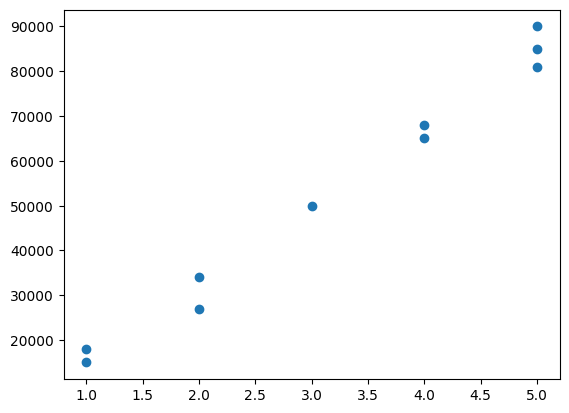

In [ ]:
# menampilkan scatter plot dari dataset
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(bedrooms, house_price)

In [ ]:
from sklearn.linear_model import LinearRegression
# latih model dengan Linear Regression.fit()
bedrooms = bedrooms.reshape(-1, 1)
linreg = LinearRegression()
linreg.fit(bedrooms, house_price)

LinearRegression()

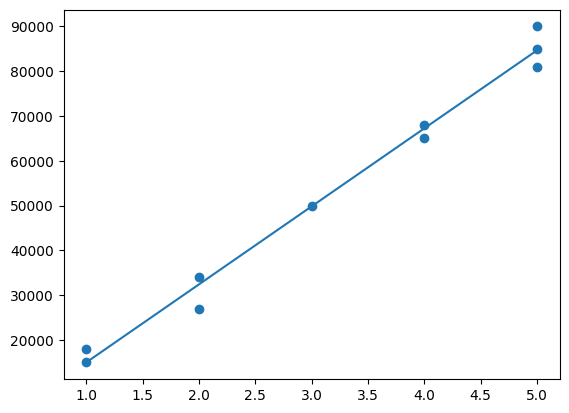

In [ ]:
# menampilkan plot hubungan antara jumlah kamar dengan harga rumah
plt.scatter(bedrooms, house_price)
plt.plot(bedrooms, linreg.predict(bedrooms))

In [ ]:
# Data testing
# Jumlah kamar yang ingin diprediksi harganya
X_test = np.array([[6], [7]])
# Melakukan prediksi harga kamar
y_pred = linreg.predict(X_test)
# Menampilkan hasil prediksi
for i in range(len(X_test)):
    print("Jumlah kamar:", X_test[i][0])
    print("Prediksi harga kamar:", y_pred[i])
    print()

Jumlah kamar: 6
Prediksi harga kamar: 102110.16949152542

Jumlah kamar: 7
Prediksi harga kamar: 119542.37288135593



In [ ]:
# uji akurasi model
linreg.score(X_test, y_pred)

1.0

### Logistic Regression


In [ ]:
import pandas as pd
# membaca dataset dan mengubahnya menjadi dataframe
df = pd.read_csv('Social_Network_Ads.csv')

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
# drop kolom yang tidak diperlukan
data = df.drop(columns=['User ID'])

# jalankan proses one-hot encoding dengan pd.get_dummies()
data = pd.get_dummies(data)
data

In [ ]:
# pisahkan atribut dan label
predictions = ['Age' , 'EstimatedSalary' , 'Gender_Female' , 'Gender_Male']
X = data[predictions]
y = data['Purchased']

In [ ]:
# lakukan normalisasi terhadap data yang kita miliki
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
scaled_data = pd.DataFrame(scaled_data, columns= X.columns)
scaled_data.head()

In [ ]:
from sklearn.model_selection import train_test_split

# bagi data menjadi train dan test untuk setiap atribut dan label
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn import linear_model

# latih model dengan fungsi fit
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)

In [ ]:
# uji akurasi model
model.score(X_test, y_test)

## Tugas Praktikum